In [ ]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

# xgboost regressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [ ]:
columnas = ['Temp_Las Varas AgriculturaCba','Humedad_Las Varas AgriculturaCba',
            'Temp_San Miguel - Establecimiento Don Luis','Humedad_San Miguel - Establecimiento Don Luis',
            'Temp_San Miguel - Listello','Humedad_San Miguel - Listello','Temp_ San Miguel - Las Varillas','Humedad_ San Miguel - Las Varillas']

x = df[columnas]

y = df['Humedad_Alicia AgriculturaCba']

In [ ]:
# Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def get_scores_test(model):
  """
  Función que obtiene el MSE en test
  """
  mse = mean_squared_error(
          y_true=y_test,
          y_pred = model.predict(x_test),
          squared = True
          )
  
  print(f'El error (MSE) en test es: {mse}')
    

In [ ]:
def get_cv_scores_train(model):
  """
  Función que obtiene el MSE en train
  """
  scores = cross_val_score(
                  model,
                  X = x_train,
                  y = y_train,
                  cv = 5,
                  scoring = 'neg_mean_squared_error'
                  )
  print('El error (MSE) en train es: ',scores.mean()*(-1))


# XGB Regressor

In [1]:
clf = XGBRegressor()
#params={'max_depth':[7,8,9,10,11],'learning_rate':[0.0,0.1,0.01,0.005], 'gamma':[0.0,0.1,0.01,0.005],'reg_lambda':[0.0,0.1,0.01,0.005], 'reg_alpha':[0.0,0.1,0.01,0.005],'n_estimators':[100,300,650,700]}

params = [{'objective':['reg:squarederror'],'min_child_weight':[2,3,4,5], 'gamma':[i/10.0 for i in range(3,12)],  'subsample':[i/10.0 for i in range(6,10)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [6,9,11,13], 'n_estimators':[100,400,700]},{'objective':['reg:linear'],'min_child_weight':[2,3,4,5], 'gamma':[i/10.0 for i in range(3,12)],  'subsample':[i/10.0 for i in range(6,10)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [6,9,11,13], 'n_estimators':[100,400,700]}]

grilla=RandomizedSearchCV(clf,params,cv=5,scoring='neg_mean_squared_error', verbose=3)
grilla.fit(x_train,y_train)

NameError: ignored

In [ ]:
grilla.best_params_

In [ ]:
modelo = XGBRegressor(n_estimators=700, max_depth=11, subsample=0.9, colsample_bytree=1,objective= 'reg:linear',gamma=0.7, min_child_weight= 5)

In [ ]:
# Fit best model
#modelo=grilla.best_estimator_
modelo.fit(x_train, y_train)

In [ ]:
# Evalúo train
get_cv_scores_train(modelo)

# Evalúo test
get_scores_test(modelo)

Gráfico para la presentación

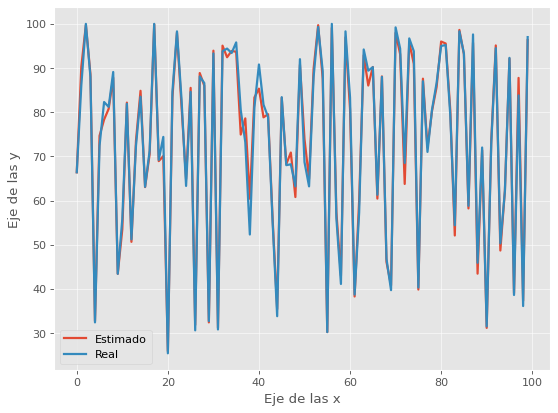

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

pyplot.style.use('ggplot')

figure(figsize=(8, 6), dpi=80)


pyplot.plot(y_pred[:100])
pyplot.plot(y[:100])
plt.legend(['Estimado','Real'])
plt.xlabel('Eje de las x')
plt.ylabel('Eje de las y')
plt.show()